In [2]:
from glob import glob
import pandas as pd

base = "/scratch/network/lg0508/lgn/HPO/campaign_2621439/"
dfs = []
for p in glob(base + "*"):
    name = p[len(base):]
    print(name)
    thresholds = name.split("t_")[1].split("_k")[0]
    thresholds = [int(t) for t in thresholds.split("_")]
    n_kernels = name.split("_k_")[1].split("_s_")[0]
    stride = name.split("_s_")[1].split("_d_")[0]
    tree_depth = name.split("_d_")[1]
    print(f"thresholds: {thresholds}, n_kernels: {n_kernels}, stride: {stride}, tree_depth: {tree_depth}")
    log_path = p + "/losses.csv"
    df = pd.read_csv(log_path)
    # use index as column "epoch"
    df["epoch"] = df.index
    df["thresholds"] = str(thresholds)
    df["n_thresholds"] = len(thresholds)
    df["n_kernels"] = int(n_kernels)
    df["stride"] = int(stride)
    df["tree_depth"] = int(tree_depth)
    dfs.append(df)

# merge all dataframes
df = pd.concat(dfs)



t_0_1_2_k_64_s_1_d_3
thresholds: [0, 1, 2], n_kernels: 64, stride: 1, tree_depth: 3
t_1_2_3_k_64_s_1_d_3
thresholds: [1, 2, 3], n_kernels: 64, stride: 1, tree_depth: 3
t_0_1_2_k_64_s_1_d_4
thresholds: [0, 1, 2], n_kernels: 64, stride: 1, tree_depth: 4
t_1_2_3_k_64_s_1_d_4
thresholds: [1, 2, 3], n_kernels: 64, stride: 1, tree_depth: 4


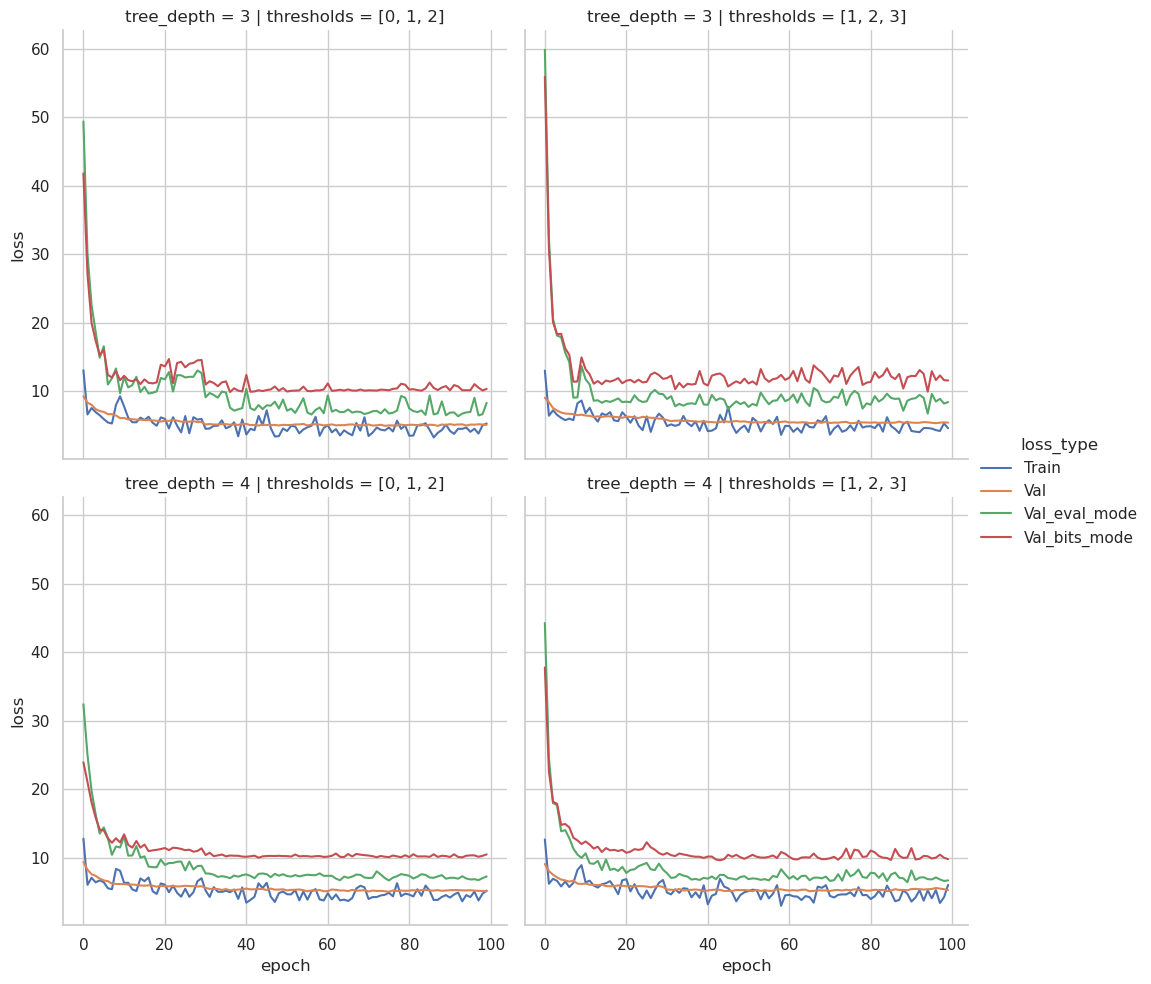

In [3]:
import seaborn as sns

# Melt the dataframe to convert train/val columns into a single column
df_melted = df.melt(
    id_vars=["epoch", "n_kernels", "stride", "thresholds", "tree_depth"], 
    value_vars=["train_train_mode", "val_train_mode", "val_eval_mode", "val_bits_mode"],
    var_name="loss_type", 
    value_name="loss"
)

# Clean up the loss_type labels
df_melted["loss_type"] = df_melted["loss_type"].str.replace("_train_mode", "").str.capitalize()

# Now plot with hue for both hyperparameters AND loss type
sns.set_theme(style="whitegrid")
g = sns.relplot(
    data=df_melted,
    x="epoch",
    y="loss",
    # hue="n_kernels",
    # style="loss_type",  # This will distinguish train vs val
    hue="loss_type",
    col="thresholds",
    row="tree_depth",
    kind="line",
    facet_kws={"sharey": True, "sharex": True},
)


In [ ]:
# for each combination of thresholds, tree_depth, n_kernels, and stride, find the lowest val_bin_mode

best_epochs = df.loc[df.groupby(["thresholds", "tree_depth", "n_kernels", "stride"])["val_bits_mode"].idxmin()]

print(best_epochs)


NameError: name 'df' is not defined